In [11]:
import pandas as pd
dataset = pd.read_csv("odi.csv")
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [3]:
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

correlation  

In [4]:
numericalColumns = ['runs','wickets','overs','striker','non-striker','total']

In [5]:
corr_df=dataset[numericalColumns]

In [6]:
cor= corr_df.corr(method='pearson')

In [7]:
import seaborn as sns

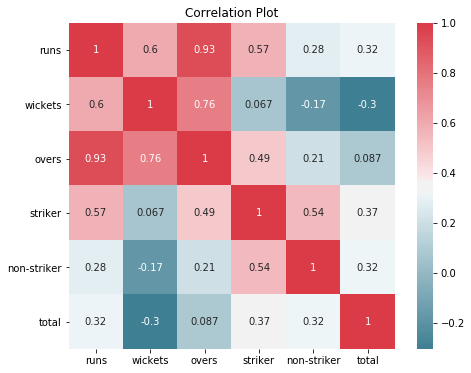

In [48]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)
plt.savefig("Correlation.png", bbox_inches='tight')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [18]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 79.56240451298967
Custom accuracy: 77.16500427472214


In [19]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [315.98]


In [ ]:
y_test[:5]

In [ ]:
y_pred[:5]

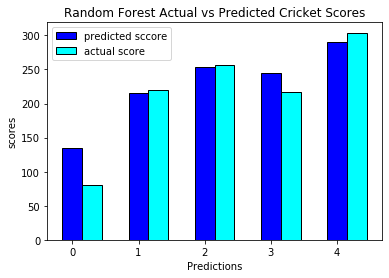

In [52]:
import matplotlib.pyplot as plt
# width of the bars
barWidth = 0.3

# Choose the height of the blue bars
bars1 = y_pred[:5]
 
# Choose the height of the cyan bars
bars2 = y_test[:5]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='predicted sccore')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='actual score')
                   
plt.ylabel('scores')
plt.xlabel('Predictions')
plt.legend()
plt.title('Random Forest Actual vs Predicted Cricket Scores')
plt.savefig("ActualVsPredictedRandomForest.png", bbox_inches='tight')
# Show graphic
plt.show()


Tuning 

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier

In [25]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc.fit(X_train,y_train)

In [ ]:
CV_rfc.best_params_

In [22]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [23]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
pred=rfc1.predict(X_test)

In [28]:
score = 

In [30]:
print("Score",rfc1.score(X_test,y_test)*100)

Score 11.301225420347677


Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
prediction = model.predict(X_test)

In [35]:
model.score(X_test,y_test)*100

52.737657811129445

In [36]:
print("Custom accuracy:" , custom_accuracy(y_test,prediction,20))

Custom accuracy: 43.354801937874036


In [37]:
from sklearn.model_selection import cross_val_predict

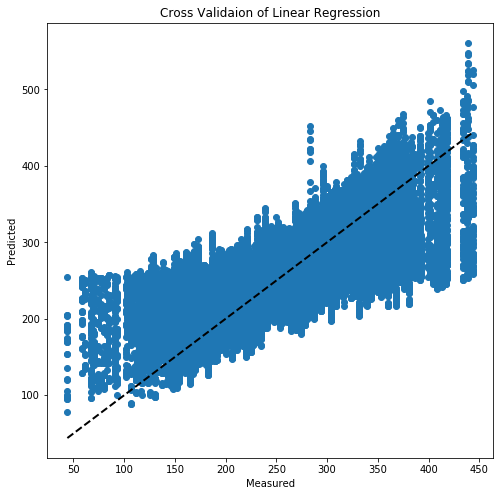

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Cross Validaion of Linear Regression')
plt.savefig("CrossvalidationPLot.png", bbox_inches='tight')
plt.show()

Comparisions 

In [39]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [315.98]


In [40]:
linPrediction = model.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , linPrediction)

Prediction score: [322.42983935]


In [41]:
comparisionDataFrames = pd.DataFrame()

In [42]:
comparisionDataFrames['Actual'] = y_test

In [43]:
comparisionDataFrames['RandomForestPredictions'] = y_pred
comparisionDataFrames['LinearRegressionPredictions'] = prediction

In [63]:
comparisionDataFrames.head(10)

,Actual,RandomForestPredictions,LinearRegressionPredictions
0,80,135.450000,164.086749
1,220,214.830000,192.569660
2,256,253.410000,255.748306
3,217,245.589583,257.083531
4,304,290.810000,281.210930
5,210,210.600000,193.232828
6,252,252.500000,260.230233
7,282,281.200000,244.502974
8,265,273.900000,286.230874
9,155,155.910000,151.401286
